In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Dùng Pandas đọc file.



In [2]:
datasource=pd.read_csv('./weight-height.csv')
datasource.head()

,Gender,Height,Weight
0,Male,68.866302,190.385361
1,Male,68.729228,188.339285
2,Male,66.797740,172.530025
3,Male,62.332563,140.463267
4,Male,73.208026,221.779279


# Câu 2 xây dựng hàm tuyến tính bằng các giải chính xác và print ra giá trị của các giá trị của mô hình.


In [3]:
x=np.array(datasource['Height'].values)
y=np.array(datasource['Weight'].values)

reg = LinearRegression().fit(x.reshape(-1,1), y)
w1=reg.coef_[0]
w0=reg.intercept_
print('w1 :', w1)
print('w0 :', w0)

y_pred = reg.intercept_ + reg.coef_[0]*x
r2Score = r2_score(y, y_pred)
print('R2 score: ', r2Score)

w1 : 7.375975816672439
w0 : -329.1785487010726
R2 score:  0.8692137082710343


# Vẽ các điểm và đường thẳng tuyến tính đã giải bằng sklearn.

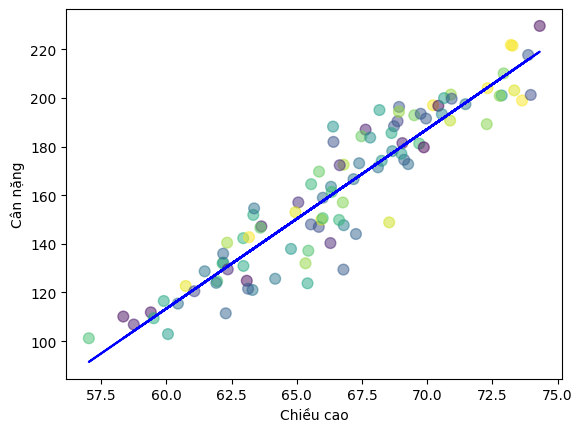

In [4]:
n = np.size(x)
colors = np.random.rand(n)
area = 60
plt.xlabel('Chiều cao')
plt.ylabel('Cân nặng')
#(x,y,kích thước chấm,màu,mờ)
plt.scatter(x, y, area, colors, alpha=0.5) 

plt.plot(x, y_pred, color = "b")

# Viết Hàm Đạo Hàm

# Tính giá trị đạo hàm hàm mất mát

In [5]:
def D_w1function (x, y, w_1 ,w_0 ): 
    n = len(x)
    y_pred=w_1 * x + w_0
    D_m = (-2/n) * sum(x * (y - y_pred))
    return D_m
def D_w0function (x, y, w_1 ,w_0): 
    n = len(x)
    y_pred=w_1 * x + w_0
    D_m = (-2/n) * sum(y - y_pred)
    return D_m

# Hàm Gradient Descent

In [6]:
def gradient_descent(alpha,w_init,iteration,tolerance):
    w_list = [w_init]
    for it in range(iteration):
        w_0 = w_list[-1][0] - alpha * D_w0function(x,y,w_list[-1][1],w_list[-1][0])
        w_1 = w_list[-1][1] - alpha * D_w1function(x,y,w_list[-1][1],w_list[-1][0])
        if (w_0 - w_list[-1][0] < tolerance) or (w_1 - w_list[-1][1] < tolerance):
            break
        w_list.append([w_0,w_1])
    return w_list,it

In [8]:
alpha = 0.000001
iteration = 3000
tolerance = 0.000001
w_init=[-400,-400]

w_list,it = gradient_descent(alpha,w_init, iteration,tolerance)
print('danh sách 5 lần lặp cuối cùng có giá trị : ')
for i in range (-6,-1):
    print('Lần thứ ',len(w_list)+i," : [",w_list[i][0],w_list[i][1],']')
    
print('\nGiá trị tối ưu nhất  :')
print('w1 :',w_list[-1][1])
print('w0 :',w_list[-1][0])
print( 'Số vòng lặp :',it)

danh sách 5 lần lặp cuối cùng có giá trị : 
Lần thứ  1286  : [ -393.89265575013934 8.33968700748638 ]
Lần thứ  1287  : [ -393.89265472836263 8.339723440260693 ]
Lần thứ  1288  : [ -393.89265371144234 8.339759548301265 ]
Lần thứ  1289  : [ -393.89265269933514 8.339795334501954 ]
Lần thứ  1290  : [ -393.8926516919982 8.339830801730832 ]

Giá trị tối ưu nhất  :
w1 : 8.339865952830413
w0 : -393.892650689389
Số vòng lặp : 1291


# Vẽ các điểm và đường thẳng bằng gradient descent.

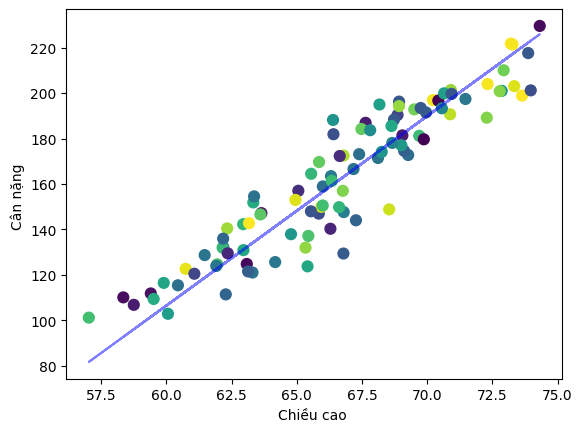

In [9]:
y_GradientDescent =  w_list[-1][1] * x+ w_list[-1][0]
plt.scatter(x, y, 60 ,colors)
plt.xlabel('Chiều cao ')
plt.ylabel('Cân nặng ')
plt.plot(x,y_GradientDescent, c = 'b', alpha=0.5)

# Vẽ tất cả điểm và đường thẳng 

(-400.0, 300.0)

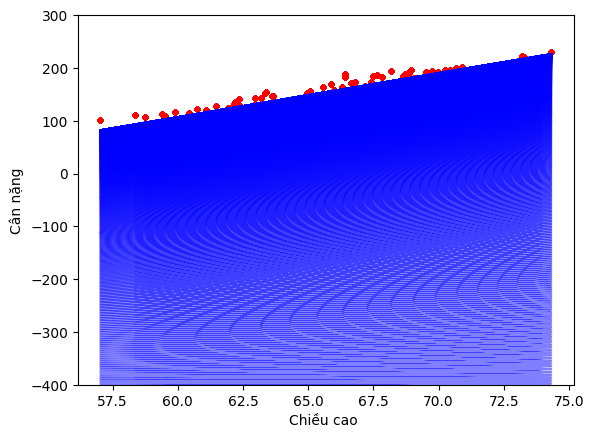

In [13]:
for i in range (len(w_list)):
    y_GradientDescent =  w_list[i][1] * x+ w_list[i][0]
    plt.scatter(x, y, 20 , 'r')
    plt.plot(x,y_GradientDescent, c = 'b', alpha=0.5)
plt.xlabel('Chiều cao ')
plt.ylabel('Cân nặng')  
plt.ylim(-400, 300)